**Steps: Import dataset -> Cleaning -> EDA -> Train_Test Split -> train on different models and evaluation -> 
final output -> comparision with actual result -> prediction with new data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('Advertising.csv')
sales_df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
141,142,193.7,35.4,75.6,19.2
102,103,280.2,10.1,21.4,14.8
21,22,237.4,5.1,23.5,12.5
48,49,227.2,15.8,49.9,14.8
43,44,206.9,8.4,26.4,12.9


"Unnamed" will be dropped

In [3]:
sales_df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
sales_df.shape

(200, 4)

In [5]:
sales_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#checking for NUll values
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
X = sales_df.drop('Sales',axis=1)
y = sales_df['Sales']

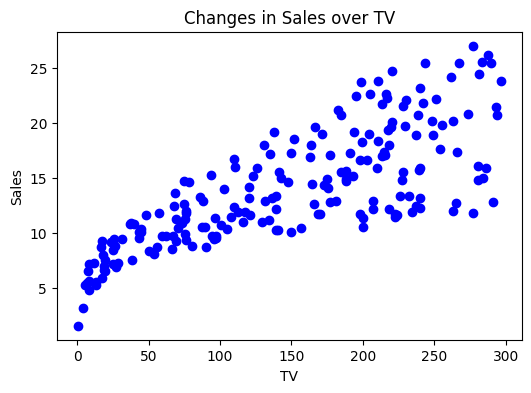

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(X['TV'], y, 'bo')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Changes in Sales over TV')
plt.show()

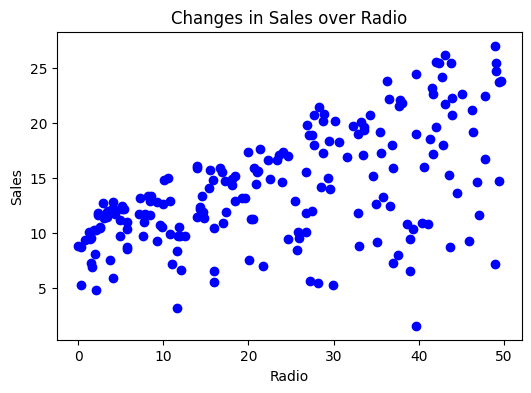

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(X['Radio'], y, 'bo')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Changes in Sales over Radio')
plt.show()

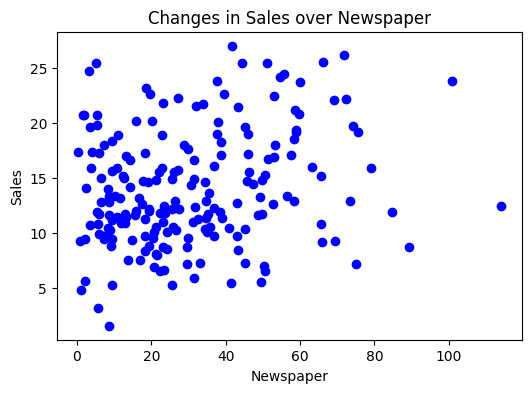

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(X['Newspaper'], y, 'bo')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Changes in Sales over Newspaper')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)

In [14]:
print(r2_score(y_test,y_pred_knn))

0.9353467488437144


In [15]:
svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm= svm.predict(X_test)

In [16]:
print(r2_score(y_test,y_pred_svm))

0.7825688076230082


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [18]:
r2 = r2_score(y_test,y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)

In [19]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.813872487468674
R-squared: 0.8805303427585902


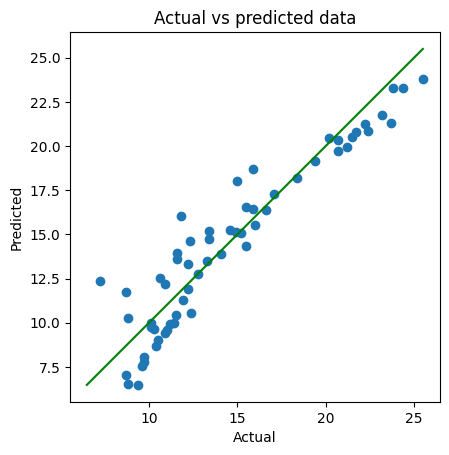

In [20]:
p1=max(max(y_pred_lr),max(y_test))
p2=min(min(y_pred_lr),min(y_test))
plt.scatter(y_test,y_pred_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted data")
plt.plot([p1,p2],[p1,p2],'g-')
plt.axis('square')
plt.show()

Predicted with some new values

In [21]:
new_data = pd.DataFrame([[10, 5, 8]], columns=['TV', 'Radio','Newspaper'])
new_prediction = lr_model.predict(new_data)
print("New data prediction:", new_prediction)

New data prediction: [4.21289571]
